## **Credit card fraud detection**

In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.16.1


In [2]:
import tensorflow as tf

import matplotlib.pyplot as plt
import keras
import re
import os
from keras.models import load_model
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# **Preprocesing**

In [3]:
# load the dataset


df_train = pd.read_csv('fraudTrain.csv')

df_train .head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
# cheak if there any null value or not
df_train .isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [5]:
# cheak the datatype
df_train .dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

<Axes: >

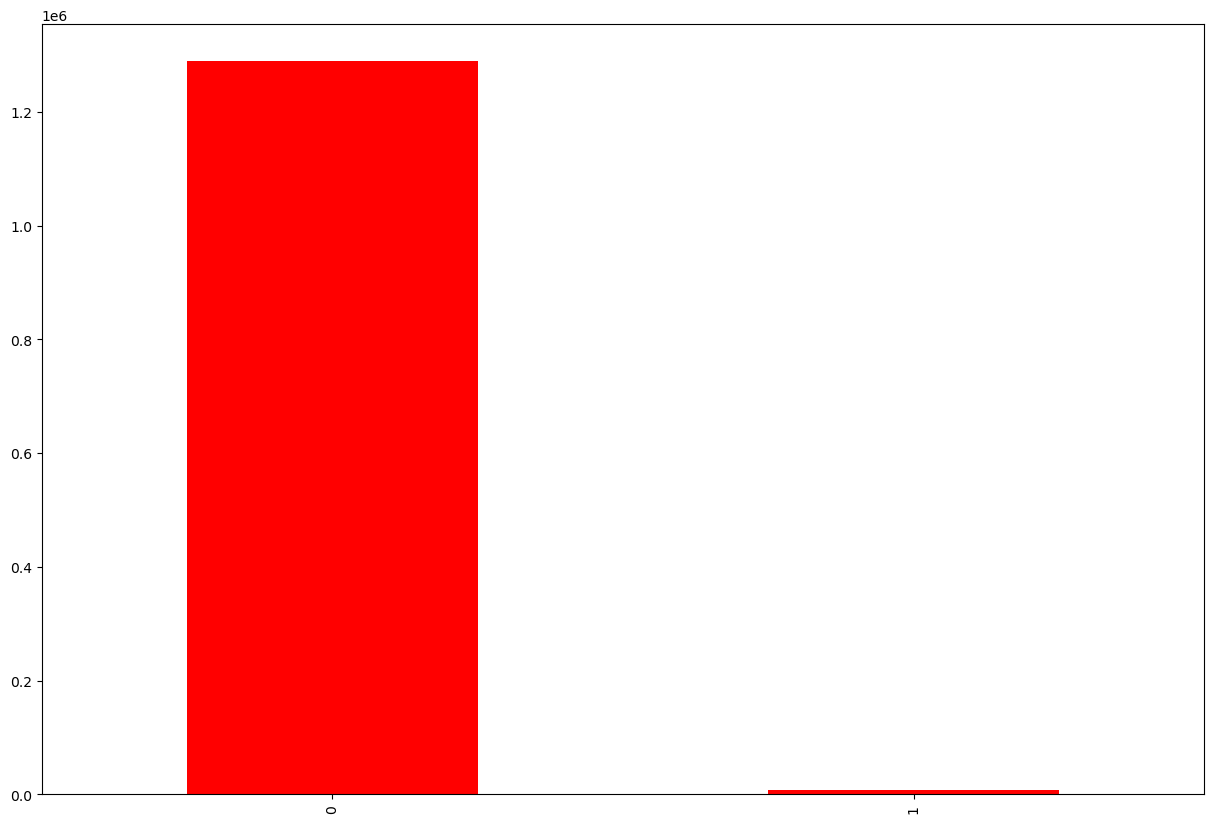

In [6]:
# plot
fraud_count = df_train ['is_fraud']
fraud_count.value_counts().plot(kind="bar",figsize=(15,10),color='red')

In [7]:
# drop unnecessary columns
df_train .drop(columns=['Unnamed: 0','merchant', 'cc_num','first', 'last','gender','trans_num','unix_time','street','merch_lat','merch_long','job','zip'], inplace= True)
df_train

,trans_date_trans_time,category,amt,city,state,lat,long,city_pop,dob,is_fraud
0,2019-01-01 00:00:18,misc_net,4.97,Moravian Falls,NC,36.0788,-81.1781,3495,1988-03-09,0
1,2019-01-01 00:00:44,grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,1978-06-21,0
2,2019-01-01 00:00:51,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,1962-01-19,0
3,2019-01-01 00:01:16,gas_transport,45.00,Boulder,MT,46.2306,-112.1138,1939,1967-01-12,0
4,2019-01-01 00:03:06,misc_pos,41.96,Doe Hill,VA,38.4207,-79.4629,99,1986-03-28,0
...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,entertainment,15.56,Hatch,UT,37.7175,-112.4777,258,1961-11-24,0
1296671,2020-06-21 12:12:19,food_dining,51.70,Tuscarora,MD,39.2667,-77.5101,100,1979-12-11,0
1296672,2020-06-21 12:12:32,food_dining,105.93,High Rolls Mountain Park,NM,32.9396,-105.8189,899,1967-08-30,0
1296673,2020-06-21 12:13:36,food_dining,74.90,Manderson,SD,43.3526,-102.5411,1126,1980-08-18,0


In [8]:
# convert all dtype in float
df_train ['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time'])
df_train ['trans_date_trans_time'] = df_train ['trans_date_trans_time'].apply(lambda x: x.timestamp())
df_train ['dob'] = pd.to_datetime(df_train ['dob'])
df_train ['dob'] = df_train ['dob'].apply(lambda x: x.timestamp())
label_encoder = LabelEncoder()
columns_to_convert_in_string_to_int = ['category','city', 'state']
for col in columns_to_convert_in_string_to_int:
    df_train [col] = label_encoder.fit_transform(df_train [col])
columns_to_convert_in_int_to_float = ['category','city', 'state','city_pop']
for col in columns_to_convert_in_int_to_float:
    df_train [col] = df_train [col].astype('float64')

In [9]:
df_train .dtypes

trans_date_trans_time    float64
category                 float64
amt                      float64
city                     float64
state                    float64
lat                      float64
long                     float64
city_pop                 float64
dob                      float64
is_fraud                   int64
dtype: object

In [10]:
X = df_train .drop(columns=['is_fraud'])
Y = df_train ['is_fraud']

In [11]:
X

,trans_date_trans_time,category,amt,city,state,lat,long,city_pop,dob
0,1.546301e+09,8.0,4.97,526.0,27.0,36.0788,-81.1781,3495.0,573868800.0
1,1.546301e+09,4.0,107.23,612.0,47.0,48.8878,-118.2105,149.0,267235200.0
2,1.546301e+09,0.0,220.11,468.0,13.0,42.1808,-112.2620,4154.0,-250905600.0
3,1.546301e+09,2.0,45.00,84.0,26.0,46.2306,-112.1138,1939.0,-93744000.0
4,1.546301e+09,9.0,41.96,216.0,45.0,38.4207,-79.4629,99.0,512352000.0
...,...,...,...,...,...,...,...,...,...
1296670,1.592742e+09,0.0,15.56,330.0,44.0,37.7175,-112.4777,258.0,-255744000.0
1296671,1.592742e+09,1.0,51.70,813.0,20.0,39.2667,-77.5101,100.0,313718400.0
1296672,1.592742e+09,1.0,105.93,346.0,32.0,32.9396,-105.8189,899.0,-73872000.0
1296673,1.592742e+09,1.0,74.90,471.0,41.0,43.3526,-102.5411,1126.0,335404800.0


In [12]:
Y

0          0
1          0
2          0
3          0
4          0
          ..
1296670    0
1296671    0
1296672    0
1296673    0
1296674    0
Name: is_fraud, Length: 1296675, dtype: int64

In [13]:
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [14]:
X

array([[-1.8518249 ,  0.45285278, -0.40782607, ...,  0.65761961,
        -0.28258876,  0.82970364],
       [-1.85182288, -0.56926552,  0.23003923, ..., -2.03387012,
        -0.29366984,  0.27097443],
       [-1.85182233, -1.59138383,  0.93414872, ..., -1.60153717,
        -0.28040632, -0.67315042],
       ...,
       [ 1.76070971, -1.33585425,  0.22193025, ..., -1.13325703,
        -0.29118603, -0.3505705 ],
       [ 1.76071469, -1.33585425,  0.02837499, ..., -0.89502874,
        -0.29043427,  0.39518895],
       [ 1.76071477, -1.33585425, -0.41200532, ..., -1.71875438,
        -0.29344133,  1.25729129]])

In [15]:
X_train, _ , Y_train, _ = train_test_split(X, Y, random_state=42)

## **For test**

In [16]:


df_test = pd.read_csv('fraudTest.csv')

df_test .head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [17]:
# cheak if there any null value or not
df_test .isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [18]:
# cheak the datatype
df_test .dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

<Axes: >

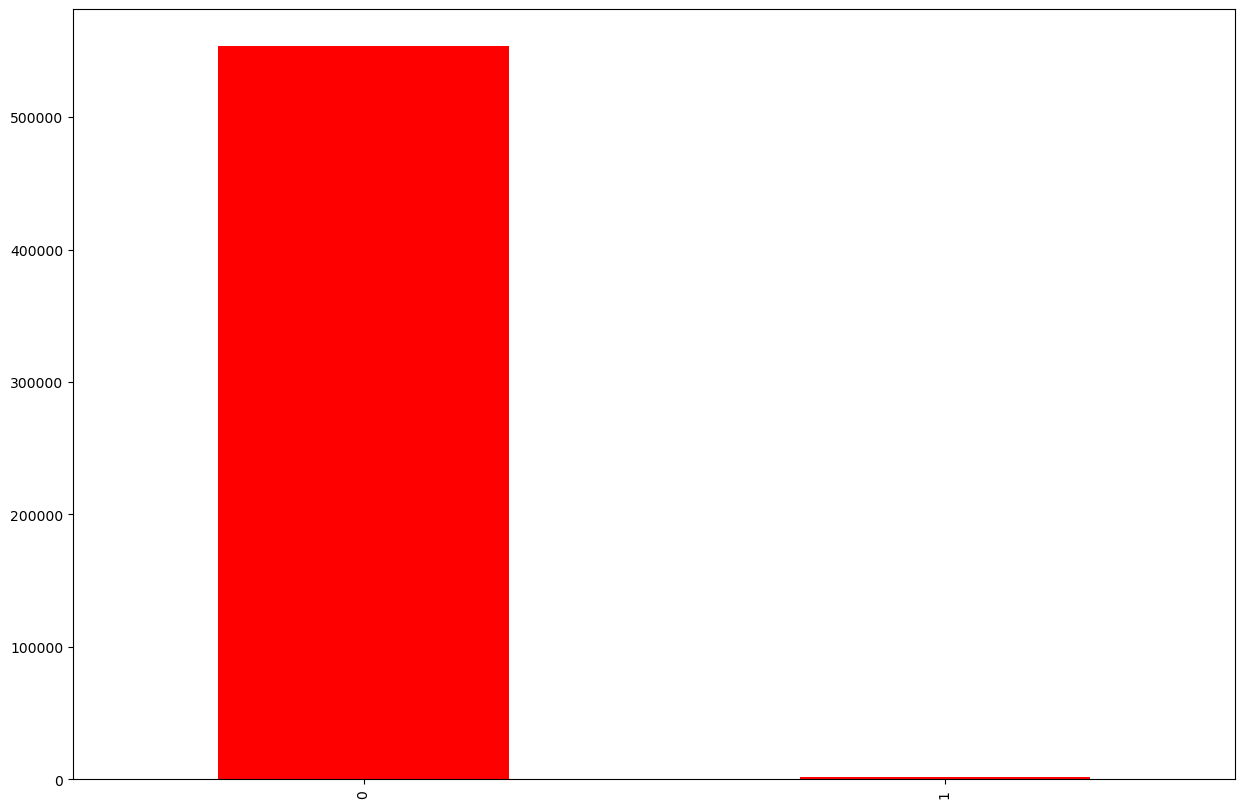

In [19]:
fraud_count = df_test ['is_fraud']
fraud_count.value_counts().plot(kind="bar",figsize=(15,10),color='red')

In [20]:
# drop unnecessary columns
df_test .drop(columns=['Unnamed: 0','merchant', 'cc_num','first', 'last','gender','trans_num','unix_time','street','merch_lat','merch_long','job','zip'], inplace= True)
df_test

,trans_date_trans_time,category,amt,city,state,lat,long,city_pop,dob,is_fraud
0,2020-06-21 12:14:25,personal_care,2.86,Columbia,SC,33.9659,-80.9355,333497,1968-03-19,0
1,2020-06-21 12:14:33,personal_care,29.84,Altonah,UT,40.3207,-110.4360,302,1990-01-17,0
2,2020-06-21 12:14:53,health_fitness,41.28,Bellmore,NY,40.6729,-73.5365,34496,1970-10-21,0
3,2020-06-21 12:15:15,misc_pos,60.05,Titusville,FL,28.5697,-80.8191,54767,1987-07-25,0
4,2020-06-21 12:15:17,travel,3.19,Falmouth,MI,44.2529,-85.0170,1126,1955-07-06,0
...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,health_fitness,43.77,Luray,MO,40.4931,-91.8912,519,1966-02-13,0
555715,2020-12-31 23:59:09,kids_pets,111.84,Lake Jackson,TX,29.0393,-95.4401,28739,1999-12-27,0
555716,2020-12-31 23:59:15,kids_pets,86.88,Burbank,WA,46.1966,-118.9017,3684,1981-11-29,0
555717,2020-12-31 23:59:24,travel,7.99,Mesa,ID,44.6255,-116.4493,129,1965-12-15,0


In [21]:
# convert all dtype in float
df_test ['trans_date_trans_time'] = pd.to_datetime(df_test['trans_date_trans_time'])
df_test ['trans_date_trans_time'] = df_test ['trans_date_trans_time'].apply(lambda x: x.timestamp())
df_test ['dob'] = pd.to_datetime(df_test ['dob'])
df_test ['dob'] = df_test ['dob'].apply(lambda x: x.timestamp())

In [22]:
label_encoder = LabelEncoder()
columns_to_convert = ['category','city', 'state']
for col in columns_to_convert:
    df_test [col] = label_encoder.fit_transform(df_test [col])


In [23]:
columns_to_convert = ['category','city', 'state','city_pop']
for col in columns_to_convert:
    df_test [col] = df_test [col].astype('float64')


In [24]:
df_test .dtypes

trans_date_trans_time    float64
category                 float64
amt                      float64
city                     float64
state                    float64
lat                      float64
long                     float64
city_pop                 float64
dob                      float64
is_fraud                   int64
dtype: object

In [25]:
X_test_initial = df_test .drop(columns=['is_fraud'])
Y_test_initial = df_test ['is_fraud']

In [26]:
X_test_initial

,trans_date_trans_time,category,amt,city,state,lat,long,city_pop,dob
0,1.592742e+09,10.0,2.86,157.0,39.0,33.9659,-80.9355,333497.0,-56419200.0
1,1.592742e+09,10.0,29.84,16.0,43.0,40.3207,-110.4360,302.0,632534400.0
2,1.592742e+09,5.0,41.28,61.0,33.0,40.6729,-73.5365,34496.0,25315200.0
3,1.592742e+09,9.0,60.05,764.0,8.0,28.5697,-80.8191,54767.0,554169600.0
4,1.592742e+09,13.0,3.19,247.0,21.0,44.2529,-85.0170,1126.0,-457315200.0
...,...,...,...,...,...,...,...,...,...
555714,1.609459e+09,5.0,43.77,443.0,23.0,40.4931,-91.8912,519.0,-122515200.0
555715,1.609459e+09,7.0,111.84,401.0,42.0,29.0393,-95.4401,28739.0,946252800.0
555716,1.609459e+09,7.0,86.88,104.0,46.0,46.1966,-118.9017,3684.0,375840000.0
555717,1.609459e+09,13.0,7.99,476.0,12.0,44.6255,-116.4493,129.0,-127699200.0


In [27]:
Y_test_initial

0         0
1         0
2         0
3         0
4         0
         ..
555714    0
555715    0
555716    0
555717    0
555718    0
Name: is_fraud, Length: 555719, dtype: int64

In [28]:
scaler = StandardScaler()
X_test_initial= scaler.fit_transform(X_test_initial)

In [29]:
X_test_initial

array([[-1.70387057,  0.9616832 , -0.42446311, ...,  0.677451  ,
         0.81652054, -0.32414447],
       [-1.70386903,  0.9616832 , -0.25233729, ..., -1.47245426,
        -0.2926852 ,  0.92833581],
       [-1.70386518, -0.31615123, -0.17935288, ...,  1.21666725,
        -0.17885341, -0.17555576],
       ...,
       [ 1.5103518 ,  0.19498254,  0.11156401, ..., -2.08940832,
        -0.28142652,  0.46167931],
       [ 1.51035353,  1.72838387, -0.39173496, ..., -1.91068498,
        -0.29326111, -0.45372764],
       [ 1.51035546, -1.59398566, -0.19944911, ..., -0.52824645,
         0.09247663,  1.11823406]])

In [30]:
X_test, _ , Y_test, _ = train_test_split(X_test_initial, Y_test_initial, random_state=42)

## **Shape of the train and test set**

In [31]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((972506, 9), (416789, 9), (972506,), (416789,))

# **Models**

**Tensorflow model (custom)**

In [32]:
model = Sequential([
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [33]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
history = model.fit(X_train, Y_train, epochs=15, batch_size=1024, validation_split=0.2)

Epoch 1/15
760/760 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9845 - loss: 0.0629 - val_accuracy: 0.9944 - val_loss: 0.0199
Epoch 2/15
760/760 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9944 - loss: 0.0199 - val_accuracy: 0.9954 - val_loss: 0.0167
Epoch 3/15
760/760 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9957 - loss: 0.0162 - val_accuracy: 0.9959 - val_loss: 0.0147
Epoch 4/15
760/760 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9959 - loss: 0.0151 - val_accuracy: 0.9961 - val_loss: 0.0138
Epoch 5/15
760/760 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9961 - loss: 0.0138 - val_accuracy: 0.9961 - val_loss: 0.0127
Epoch 6/15
760/760 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9963 - loss: 0.0124 - val_accuracy: 0.9960 - val_loss: 0.0133
Epoch 7/15
760/760 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9965 - loss: 0.0120 - val_accuracy: 0.9965 - val_loss: 0.0116
Epoch 8/15
760/760 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9964 - loss: 0.0120 - val_accuracy: 0.

**Logistic Regression**

In [35]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

LogisticRegression()

**Decision Tree**

In [36]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

**Random Forest**

# **Models evaluation and predection**

**Tensorflow model**

In [38]:
# Evaluate
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'\n Accuracy: {accuracy}')

# Predict
y_pred_tf = (model.predict(X_test) > 0.5).astype("int32")

13025/13025 ━━━━━━━━━━━━━━━━━━━━ 12s 892us/step - accuracy: 0.9974 - loss: 0.0092

 Accuracy: 0.9974039793014526
13025/13025 ━━━━━━━━━━━━━━━━━━━━ 13s 995us/step


**Logistic Regression**

In [39]:
# Predict
y_pred_log_reg = log_reg.predict(X_test)
print(f"Accuracy: {accuracy_score(Y_test, y_pred_log_reg)}")
print(classification_report(Y_test, y_pred_log_reg))

Accuracy: 0.9954485363097395
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    415173
           1       0.00      0.00      0.00      1616

    accuracy                           1.00    416789
   macro avg       0.50      0.50      0.50    416789
weighted avg       0.99      1.00      0.99    416789



**Decision Tree**

In [40]:
# Predict
y_pred_tree = decision_tree.predict(X_test)
print(f"Accuracy: {accuracy_score(Y_test, y_pred_tree)}")
print(classification_report(Y_test, y_pred_tree))

Accuracy: 0.9960843496349472
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    415173
           1       0.50      0.61      0.55      1616

    accuracy                           1.00    416789
   macro avg       0.75      0.80      0.77    416789
weighted avg       1.00      1.00      1.00    416789



# **confusion matrix**

In [42]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Fraud'], yticklabels=['Legitimate', 'Fraud'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('True vs Predicted matrix')
    plt.show()


**Tensorflow model**

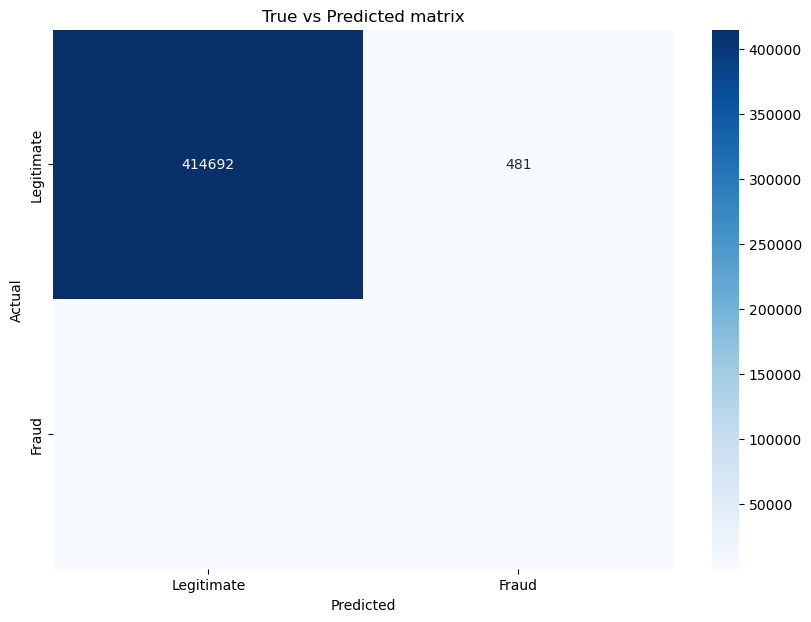

In [43]:
plot_confusion_matrix(Y_test, y_pred_tf)

**Logistic Regression**

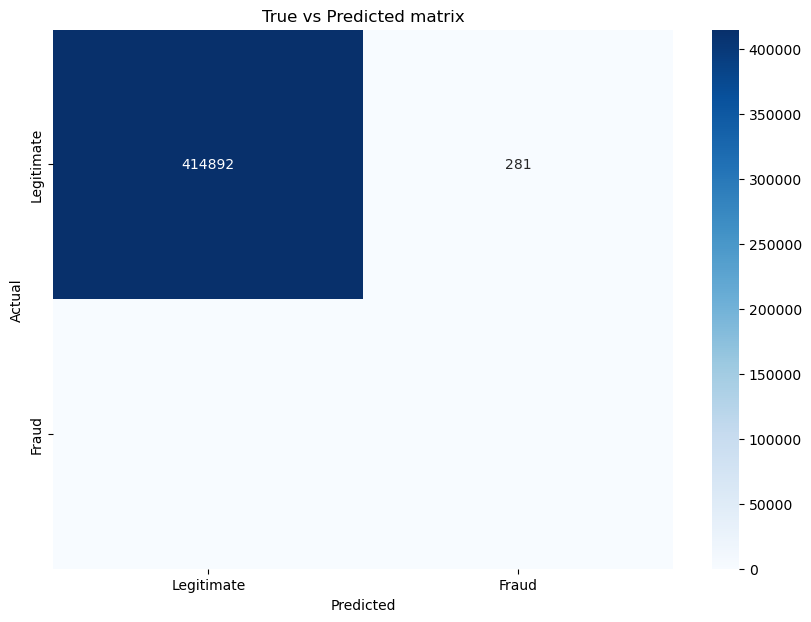

In [44]:
plot_confusion_matrix(Y_test, y_pred_log_reg)

**Decision Tree**

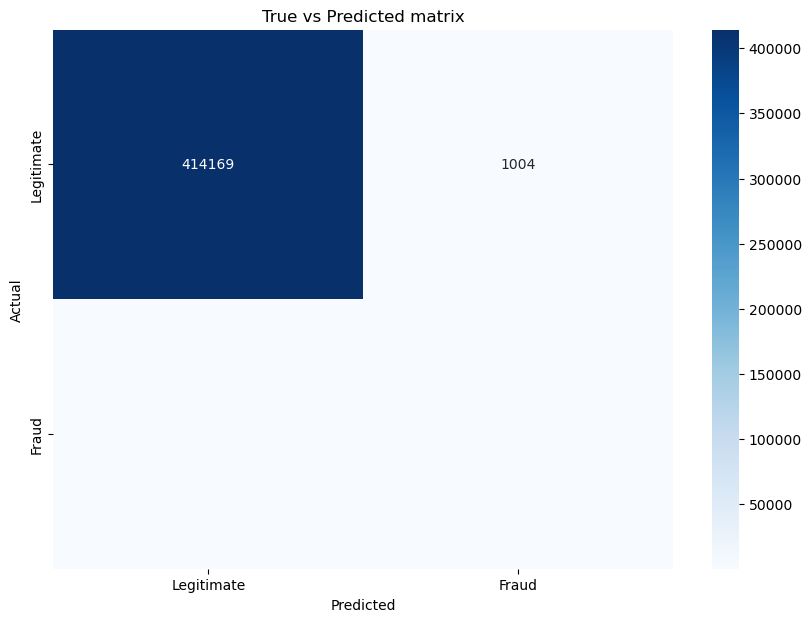

In [45]:
plot_confusion_matrix(Y_test, y_pred_tree)